In [6]:
# what am i doing
# create my model (like hw 5?)
# train my model on the training data (just a part?)
    # while training decide which features to use to produce greatest accuracy
        # features like sets of attributes? columns?
# calculate accuracy
# fill in the test
# submit..?

# okay so basically hes already makde everythign for us it sjsut that his model is not very good
# so we can
    # change the features (do this first)
        # decide which columns to use (do not use score (target values))
        # remember you can combine features
            # start with sentiment analysis
                # maybe use blob? adapt lsa? nltk vader?
    # change the model 

# Libraries

In [7]:
import pickle
import pandas as pd
import seaborn as sns
from os.path import exists
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import re
import numpy as np
from textblob import TextBlob
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from nltk.corpus import stopwords
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

# Loading the Files

Download the csv files into the `data/` directory.

train.csv shape is  (1697533, 9)
test.csv shape is  (212192, 2)

        Id   ProductId          UserId  HelpfulnessNumerator  \
0   914403  B0009W5KHM   AV6QDP8Q0ONK4                     2   
1   354887  6303079709  A2I8RXJN80A2D2                     0   
2  1407653  B004H0M2XC  A3FHV3RV8Z12E6                     0   
3  1377458  B003ZJ9536  A12VLTA3ZHVPUY                     1   
4   475323  630574453X  A13NM1PES9OXVN                     2   

   HelpfulnessDenominator        Time  \
0                       2  1341014400   
1                       0  1168819200   
2                       0  1386201600   
3                       1  1348704000   
4                       3   970012800   

                                         Summary  \
0                                  GOOD FUN FILM   
1                                   Movie Review   
2             When is it a good time to Consent?   
3                                          TRUTH   
4  Intelligent and bittersweet -- stays wit

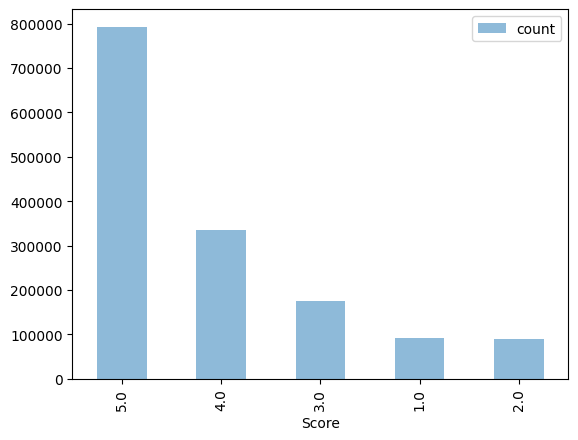


EVERYTHING IS PROPERLY SET UP! YOU ARE READY TO START


In [8]:
trainingSet = pd.read_csv("./data/train.csv")
testingSet = pd.read_csv("./data/test.csv")

print("train.csv shape is ", trainingSet.shape)
print("test.csv shape is ", testingSet.shape)

print()

print(trainingSet.head())
print()
print(testingSet.head())

print()

print(trainingSet.describe())

trainingSet['Score'].value_counts().plot(kind='bar', legend=True, alpha=.5)
plt.show()

print()
print("EVERYTHING IS PROPERLY SET UP! YOU ARE READY TO START")

# Plots to try and figure out wt features related to stars


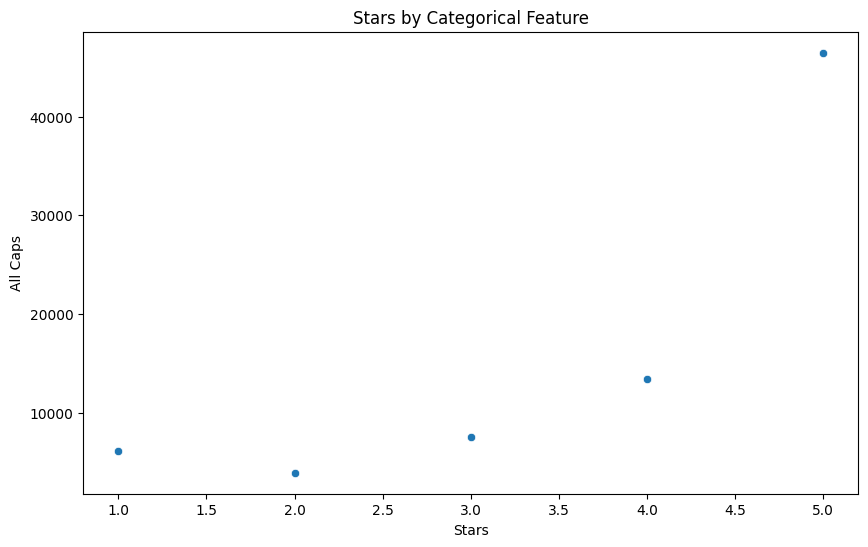

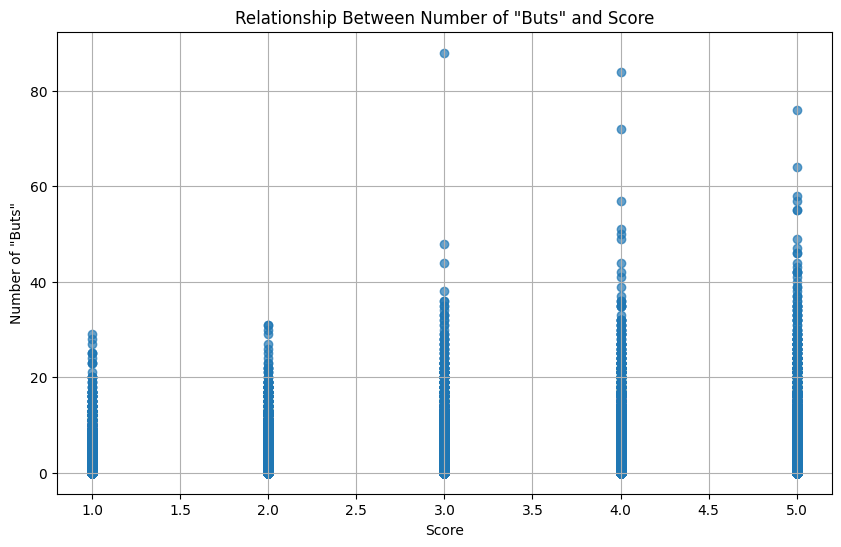

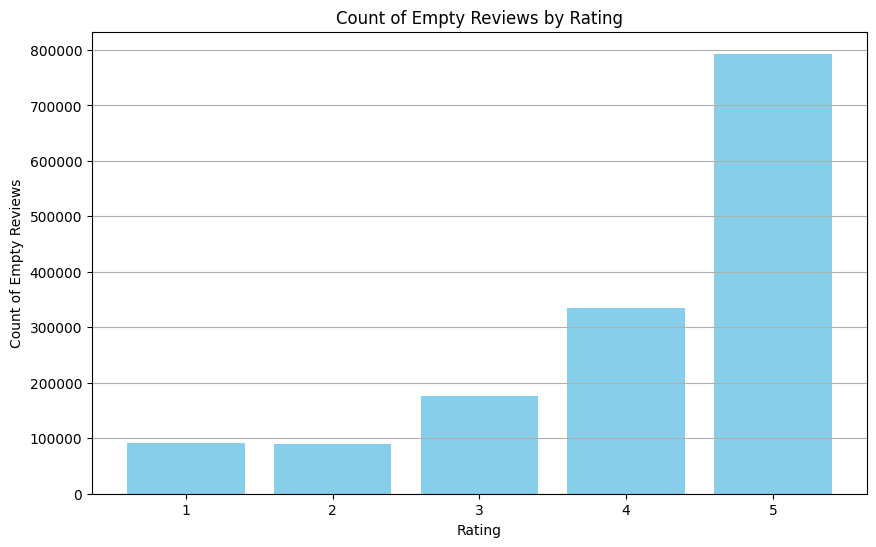

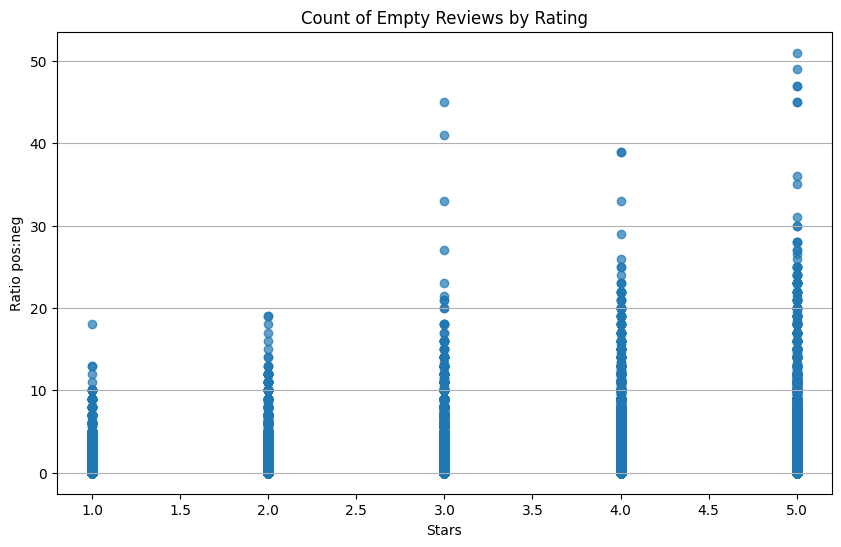

In [4]:
# plots
dfTemp = pd.read_csv("./data/train.csv")
# try length and stars
# dfTemp['Text'].fillna("", inplace=True)
# dfTemp['Length'] = dfTemp['Text'].str.len()
# plt.figure(figsize=(10, 6))
# sns.scatterplot(data=dfTemp, x='Score', y='Length')
# plt.title('Stars by Categorical Feature')
# plt.xlabel('Stars')
# plt.ylabel('Categorical Feature')
# plt.show()

# try all capital summaries -> seems to be good at distinguishing 5s?
def is_all_caps(text):
    if isinstance(text, str):
        return text.isupper()
    return False

dfTemp['Upper'] = dfTemp['Summary'].apply(is_all_caps)
all_caps = dfTemp.groupby('Score')['Upper'].sum().reset_index()
#all_caps.rename(columns={'Upper': 'count_all_caps'}, inplace=True)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=all_caps, x='Score', y='Upper')
plt.title('Stars by Categorical Feature')
plt.xlabel('Stars')
plt.ylabel('All Caps')
plt.show()

# try review times

# dfTemp['ReviewDate'] = pd.to_datetime(dfTemp['Time'], unit='s')
# dfTemp['ReviewYear'] = dfTemp['ReviewDate'].dt.year
# dfTemp['ReviewMonth'] = dfTemp['ReviewDate'].dt.month
# dfTemp['ReviewDay'] = dfTemp['ReviewDate'].dt.day
# dfTemp['ReviewDayOfWeek'] = dfTemp['ReviewDate'].dt.dayofweek 
# avg_stars_by_year_month = dfTemp.groupby(['ReviewYear', 'ReviewMonth'])['Score'].mean().unstack() # if multi index, liek add , 'ReviewMonth' then usee unstack

# plt.figure(figsize=(12, 6))
# avg_stars_by_year_month.plot(kind='line', marker='o')
# plt.title('Average Star Ratings Over Time')
# plt.xlabel('Year')
# plt.ylabel('Average Stars')
# plt.xticks(rotation=45)
# plt.legend(title='Month')
# plt.show()

# look for buts
def count_buts(text):
    if isinstance(text, str):
        return len(re.findall(r'\bbut\b', text, re.IGNORECASE))
    return 0

dfTemp['Buts'] = dfTemp['Text'].apply(count_buts)
plt.figure(figsize=(10, 6))
plt.scatter(dfTemp['Score'], dfTemp['Buts'], alpha=0.7)
plt.title('Relationship Between Number of "Buts" and Score')
plt.ylabel('Number of "Buts"')
plt.xlabel('Score')
plt.grid(True)

# Optionally add a trend line
z = np.polyfit(dfTemp['Buts'], dfTemp['Score'], 1)
p = np.poly1d(z)
plt.plot(dfTemp['Buts'], p(dfTemp['Buts']), color='red')

plt.show()

# sentiment score feature
def calculate_sentiment(text):
    if isinstance(text, str):
        return TextBlob(text).sentiment.polarity  # Returns a value between -1 and 1
    return 0

# # Assuming dfTemp is your DataFrame
# dfTemp['SentimentScore'] = dfTemp['Text'].apply(calculate_sentiment)
# plt.figure(figsize=(10, 6))
# sns.scatterplot(data=dfTemp, x='Score', y='SentimentScore', alpha=0.7)
# plt.title('Relationship Between Number of stars and Sentiment Score')
# plt.xlabel('Number of stars')
# plt.ylabel('Sentiment Score')
# plt.grid(True)

# # Optionally add a regression line
# sns.regplot(data=dfTemp, x='Score', y='SentimentScore', scatter=False, color='red')

# plt.show()

def isEmpty(text):
    if not isinstance(text, str) or len(text):
        return 1
    return 0

dfTemp['isEmpty'] = dfTemp['Text'].apply(isEmpty)

empty_counts = dfTemp.groupby('Score')['isEmpty'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(empty_counts['Score'], empty_counts['isEmpty'], color='skyblue')
plt.title('Count of Empty Reviews by Rating')
plt.xlabel('Rating')
plt.ylabel('Count of Empty Reviews')
plt.xticks(empty_counts['Score'])  # Ensure all ratings are shown
plt.grid(axis='y')

plt.show()

# ratio of positive words to negative words


def calc_ratio(text):
    pos = ["good", "great", "enjoy", "amazing", "love", "excellent", "best"]
    neg =["bad", "hate", "awful", "worst", "suck", "terrible", "boring"]
    # Preprocess the text
    if isinstance(text, str):
        words = text.lower().split()
        
        # Count positive and negative words
        positive_count = sum(1 for word in words if word in pos)
        negative_count = sum(1 for word in words if word in neg)
        
        # Calculate ratio
        if negative_count == 0:
            return float('inf') if positive_count > 0 else 0
        
        ratio = positive_count / negative_count
        return ratio
    return 1

dfTemp['Ratio'] = dfTemp['Text'].apply(calc_ratio)
plt.figure(figsize=(10, 6))
plt.scatter(data=dfTemp, x='Score', y='Ratio', alpha=0.7)
plt.title('Count of Empty Reviews by Rating')
plt.xlabel('Stars')
plt.ylabel('Ratio pos:neg')
plt.grid(axis='y')

plt.show()


# Adding Features

In [9]:
# helpers for tfidf
nltk.download('stopwords')
stop_words = stopwords.words('english')

def preprocess_text(text):
    return ' '.join([word.lower() for word in text.split() if word.lower() not in stop_words])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tiffliu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
def add_features_to(df):
    # This is where you can do all your feature extraction

    # oh so he created a helpfulness feature
    df['Helpfulness'] = df['HelpfulnessNumerator'] / df['HelpfulnessDenominator']
    df['Helpfulness'] = df['Helpfulness'].fillna(0)

    # sentiment score analysis feature?
    # can i use LSA to see the number of positive vs negative

    # trying length of review as a feature just to play
    # df['Text'].fillna("", inplace=True)
    # df['Length'] = df['Text'].str.len()

    # trying to make a feature that sees if numbers are mentioned in the review and then use that number as rating
    df['Stars'] = df['Text'].apply(find_stars)
    df['Stars'] = df['Stars'].fillna(3)

    # try a featuee thats itf the summary is in all caps
    df['AllCaps'] = df['Summary'].apply(is_all_caps)
    # df['AllCaps'] = df['AllCaps'].fillna(False)
    # df['AllCaps'].replace({False: 0, True: 1})

    # # trying time of review
    # df['ReviewDate'] = pd.to_datetime(df['Time'], unit='s')
    # df['ReviewYear'] = df['ReviewDate'].dt.year
    # df['ReviewMonth'] = df['ReviewDate'].dt.month
    # #df['ReviewYearMonth'] = df['ReviewDate'].dt.to_period('M')
    # df['ReviewYearMonth'] = df['ReviewYear'] * 100 + df['ReviewMonth']
    # #df['ReviewYearMonth'] = df['ReviewYearMonth'].str.replace('-', '')

    # sentiment score right now freaking midterm
    df['Sentiment'] = df['Text'].apply(calculate_sentiment)
    df['SummarySentiment'] = df['Summary'].apply(calculate_sentiment)

    # number of buts
    df['Buts'] = df['Text'].apply(count_buts)

    df['Ratio'] = df['Text'].apply(calc_ratio)
    df['Positive'] = df['Text'].apply(count_pos)
    df['Negative'] = df['Text'].apply(count_neg)

    # start tfidf
    df['processed_content'] = df['Text'].fillna('').astype(str).apply(preprocess_text)
   # Extract TF-IDF features
    vectorizer = TfidfVectorizer(max_features=3000, ngram_range=(1, 2), stop_words='english')
    svd = TruncatedSVD(n_components=100, random_state=0)
    tfidf_matrix = vectorizer.fit_transform(df['Text'].fillna(''))  # Fill NaN values with an empty string
    tfidf_matrix = svd.fit_transform(tfidf_matrix)

    # Create a DataFrame from the TF-IDF matrix
    tfidf_df = pd.DataFrame(tfidf_matrix, columns=[f'text_component_{i}' for i in range(100)], index=df.index)

    df.reset_index(drop=True, inplace=True)  # Reset index to align
    df = pd.concat([df, tfidf_df], axis=1)

    return df #, vectorizer -> dont need vectorizer if already concat?

# helper function to help find 
def find_stars(text):
    if isinstance(text, str):
        if "1" in text:
            return 1
        elif "2" in text:
            return 2
        elif "3" in text:
            return 3
        elif "4" in text:
            return 4
        elif "5" in text:
            return 5
        else:
            return 3
    return 3

def is_all_caps(text):
    if isinstance(text, str):
        return text.isupper()
    return False

def calculate_sentiment(text):
    if isinstance(text, str):
        return TextBlob(text).sentiment.polarity  # Returns a value between -1 and 1
    return 0

def count_buts(text):
    if isinstance(text, str):
        return len(re.findall(r'\bbut\b', text, re.IGNORECASE))
    return 0


def calc_ratio(text):
    pos = ["good", "great", "enjoy", "amazing", "love", "excellent", "best"]
    neg =["bad", "hate", "awful", "worst", "suck", "terrible", "boring"]
    # Preprocess the text
    if isinstance(text, str):
        words = text.lower().split()
        
        # Count positive and negative words
        positive_count = sum(1 for word in words if word in pos)
        negative_count = sum(1 for word in words if word in neg)
        
        # Calculate ratio
        if negative_count == 0:
            return 1 #float('inf') if positive_count > 0 else 0
        
        ratio = positive_count / negative_count
        return ratio
    return 1

def count_pos(text):
    pos = ["good", "great", "enjoy", "amazing", "love", "excellent", "best"]
    # Preprocess the text
    if isinstance(text, str):
        words = text.lower().split()
        
        # Count positive and negative words
        positive_count = sum(1 for word in words if word in pos)
        return positive_count
    return 0

def count_neg(text):
    neg =["bad", "hate", "awful", "worst", "suck", "terrible", "boring"]
    # Preprocess the text
    if isinstance(text, str):
        words = text.lower().split()
        negative_count = sum(1 for word in words if word in neg)
        return negative_count
    return 0


# Load the feature extracted files if they've already been generated
if exists('./data/X_train.csv'):
    X_train = pd.read_csv("./data/X_train.csv")
if exists('./data/X_submission.csv'):
    X_submission = pd.read_csv("./data/X_submission.csv")

else:
    #Process the DataFrame
    train = add_features_to(trainingSet)

    #Merge on Id so that the submission set can have feature columns as well
    X_submission = pd.merge(train, testingSet, left_on='Id', right_on='Id')
    X_submission = X_submission.drop(columns=['Score_x'])
    X_submission = X_submission.rename(columns={'Score_y': 'Score'})

    # The training set is where the score is not null
    X_train =  train[train['Score'].notnull()]

    X_submission.to_csv("./data/X_submission.csv", index=False)
    X_train.to_csv("./data/X_train.csv", index=False)



# Sample + Split into training and testing set

In [14]:
# Split training set into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(
    X_train.drop(columns=['Score']),
    X_train['Score'],
    test_size=1/4.0,
    random_state=0
)


# Feature Selection

In [15]:
# # we've created features,,, now choose some to use
# features = ['Helpfulness', 'Stars', 'AllCaps','Sentiment', 'Buts', 'Ratio', 'SummarySentiment', 'Positive', 'Negative'] # added my play feature
# print(X_train.columns)
# print(features)
# X_train_select = X_train[features]
# X_test_select = X_test[features]
# X_submission_select = X_submission[features]
# # print(X_train_select.isnull().sum())
# # print(X_train_select[X_train_select['Length'].isnull()])
# print(X_train_select[X_train_select['AllCaps']])

# Define specific features and include TF-IDF features
base_features = ['Helpfulness', 'Stars', 'AllCaps','Sentiment', 'Buts', 'Ratio', 'SummarySentiment']
#tfidf_features = vectorizer.get_feature_names_out().tolist()
tfidf_features = [f'text_component_{i}' for i in range(100)]
selected_features = base_features + tfidf_features

X_train_select = X_train[selected_features]
X_test_select = X_test[selected_features]
X_submission_select = X_submission[selected_features]

# Model Creation

In [17]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# Y_train_encoded = le.fit_transform(Y_train)



# # Learn the model
#model = KNeighborsClassifier(n_neighbors=3).fit(X_train_select, Y_train)

# # Predict the score using the model
# Y_test_predictions = model.predict(X_test_select)

# Create the SVM model
#model_svm = svm.SVC(kernel='linear')  # You can try 'linear', 'poly', 'rbf', etc.

# Create an XGBoost classifier
##########model = XGBClassifier(tree_method = "hist", device = "cuda").fit(X_train_select, Y_train.astype(int) - 1)
# If you want to see feature importances
# feature_importance = model.feature_importances_
# feature_importance_dict = dict(zip(feature_names, feature_importance))
# sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# print("Top 10 most important features:")
# for feature, importance in sorted_features[:10]:
#     print(f"{feature}: {importance}")
# # Predict the score using the model
########Y_test_predictions = model.predict(X_test_select) + 1

# Fit the model
#model.fit(X_train, Y_train)

# Fit the modelsklearn
#model.fit(X_train_select, Y_train)
# Predict the scores using the SVM model
#Y_test_predictions = model.predict(X_test_select)

# ensemble???

from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

# initiliaize base
xgboost_clf = XGBClassifier(random_state=0, n_jobs=-1)
random_forest_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
knn_clf = KNeighborsClassifier()
gradient_boosting_clf = GradientBoostingClassifier(random_state=0)
adaboost_clf = AdaBoostClassifier(random_state=0)

# Define the base models for the stack
base_models = [
    ('xgboost', xgboost_clf),
    ('random_forest', random_forest_clf),
    ('knn', knn_clf),
    ('gradient_boosting', gradient_boosting_clf),
    ('adaboost', adaboost_clf)
]
# Meta-model (Logistic Regression is commonly used)
meta_model = LogisticRegression()

# Set up the stacking classifier
stacked_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, n_jobs=-1)
stacked_clf.fit(X_train_select, Y_train)
y_pred = stacked_clf.predict(X_test_select)

/Users/tiffliu/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


# Model Evaluation

Accuracy on testing set =  0.5747005407501562


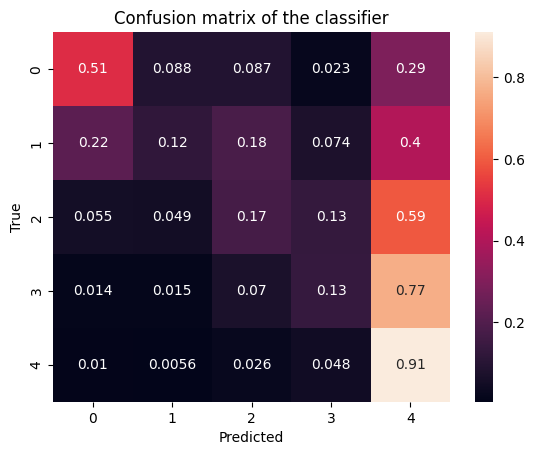

In [42]:
# Evaluate your model on the testing set
print("Accuracy on testing set = ", accuracy_score(Y_test, y_pred))

# Plot a confusion matrix
cm = confusion_matrix(Y_test, y_pred, normalize='true')
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Create submission file

In [32]:
# Create the submission file
X_submission['Score'] = model.predict(X_submission_select) + 1 #for xgboost
submission = X_submission[['Id', 'Score']]
submission.to_csv("./data/submission.csv", index=False)